# Convolution Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Load the image files from your own images folder
Apples_folder = 'Train\Apples'
my_image_files = os.listdir(Apples_folder)

Apples = []
for image_file in my_image_files:
    # Load the image file using TensorFlow's `decode_image()` function
    image = tf.io.decode_image(tf.io.read_file(os.path.join(Apples_folder, image_file)))
    # Resize the image to a specific size (e.g., 28x28 pixels)
    image = tf.image.resize(image, [28, 28])
    # Normalize the pixel values to be between 0 and 1
    image = image / 255.0
    Apples.append(image)

# Step 2: Convert the image files to a NumPy array or TensorFlow tensor
Apples = np.array(Apples)

# Step 3: Load the labels from your text file
Apples_label_file = 'Train\Train_a.txt'
Apples_label = []
with open(Apples_label_file, 'r') as f:
    for line in f:
        label = int(line.strip())
        Apples_label.append(label)

# Step 4: Store the image data and labels in separate lists or arrays
Apples = np.array(Apples)
Apples_label = np.array(Apples_label)


(Apples, Apples_label), (x_test, y_test) = datasets.mnist.load_data()
paddings = tf.constant([[0,0], [2,2], [2,2]])
x_train = tf.pad(Apples, paddings, constant_values=0)

print(Apples[1200])

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib
from tensorflow.keras import datasets, layers, models

tf.keras.utils.image_dataset_from_directory('Train', labels='inferred')



In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Specify the directory containing the image data
train_dir = 'Train'
validation_dir = 'Test'
# Define the parameters for creating the dataset
batch_size = 1
img_size = (32, 32)

# Create the dataset using the image_dataset_from_directory function
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=img_size,
    seed=42
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size
  )

class_names = train_dataset.class_names

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Model Initialize
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=( 32, 32, 3 )),
    tf.keras.layers.Reshape((32, 32 * 3)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM( 32, return_sequences=True, return_state=False )),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM( 32 )),
    tf.keras.layers.Dense( 256 ),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense( 256 ),

])
        
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10))
model.summary()

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Optimizer
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
optimizer = tf.keras.optimizers.Nadam(
    learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Nadam'
) # 0.00001

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Loss Fn
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""                               
# 1
# lossfn = tf.keras.losses.MeanSquaredLogarithmicError(reduction=tf.keras.losses.Reduction.AUTO, name='mean_squared_logarithmic_error')

# 2
lossfn = tf.keras.losses.SparseCategoricalCrossentropy( from_logits=False, reduction=tf.keras.losses.Reduction.AUTO, name='sparse_categorical_crossentropy')

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Model Summary
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
model.compile(optimizer=optimizer, loss=lossfn, metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()])

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Training
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
history = model.fit(train_dataset, epochs=4 ,validation_data=(validation_dataset))


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(tf.reshape(train_dataset[1], [32,32]), cmap=plt.cm.gray)
plt.xlabel(class_names)
plt.show()

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

# Specify the directory containing the image data
train_dir = 'Train'
validation_dir = 'Test'
# Define the parameters for creating the dataset
batch_size = 1
img_size = (32, 32)

# Create the dataset using the image_dataset_from_directory function
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=img_size,
    seed=42
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size
  )

class_names = train_dataset.class_names



model = models.Sequential()
model.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(16, (5,5), activation='relu'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10))


model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())
history = model.fit(train_dataset, epochs=4 ,validation_data=(validation_dataset))


Found 1200 files belonging to 3 classes.
Found 600 files belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                         

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

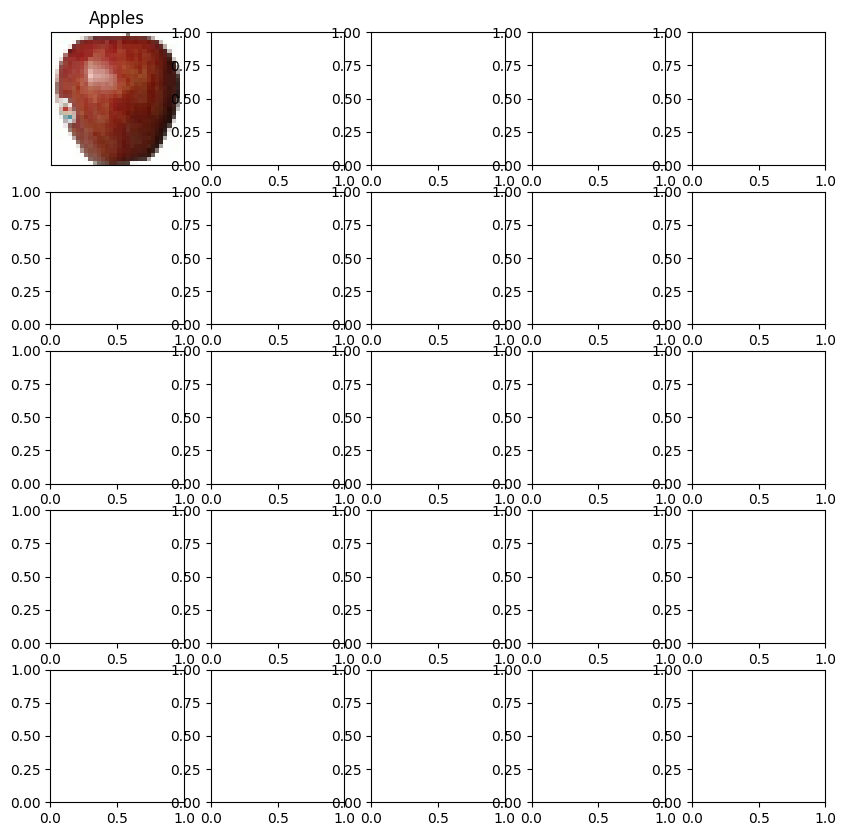

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first 25 images and labels from the train dataset
images, labels = next(iter(train_dataset.take(25)))

# Get the class names
class_names = train_dataset.class_names

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

# Loop over the subplots and plot the images and labels
for i, ax in enumerate(axes.flat):
    # Plot the image
    ax.imshow(np.array(images[i], dtype='uint8'))

    # Set the title to the corresponding class name
    ax.set_title(class_names[labels[i]])

    # Remove the x and y axis labels
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.show()
